In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import random
import tensorflow as tf
import cv2
from scipy import stats



# Read Depth Camera

In [2]:
# For reading depth camera
def read_depth_camera(dcamera_path, show_video, n_resize):
    video  = cv2.VideoCapture(dcamera_path)
    ret, frame = video.read()
    
    # Get total # of frame count 
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        
    frame_height = int(frame.shape[0])
    frame_width = int(frame.shape[1])

    
    depth_frames = np.empty((frame_count, int(frame_height/n_resize), int(frame_width/n_resize)))
    
    count = 0
    while (video.isOpened()):
        ret, frame = video.read()
        
        if ret == True:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray_frame = cv2.resize(gray_frame, \
                                    (int(frame_width/n_resize), int(frame_height/n_resize)),\
                                    interpolation = cv2.INTER_AREA)

            depth_frames[count] = gray_frame
            if show_video == True:
                cv2.imshow("Depth", gray_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            count = count + 1
        else: 
            break
            

    video.release()
    #cv2.destroyAllWindows()
    return depth_frames

In [3]:
def play_video(read_frames):

    for i in range(len(read_frames)):
        # Capture frame-by-frame
        frame = read_frames[i]

        # Display the resulting frame
        plt.imshow(frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
    #cv2.destroyAllWindows()

    return

In [4]:
def show_frame(read_frames, frame_range):
      # Capture frame-by-frame

    # Display the resulting frame
    for i in frame_range:
        fig = plt.figure(figsize=(6,6))        
        a = plt.imshow(read_frames[i])
        
    return

In [5]:

n_test = 24
date = '11_15_2020'
test_str = '/test' + str(n_test)
#data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + test_str

train_dcamera_path = data_dir + '/depth_processed_leo_test'+str(n_test)+'.avi'
show_video = 0
n_resize = 1
x_train = read_depth_camera(train_dcamera_path, show_video, n_resize)


# read fdss data

In [6]:
n_test = 24
date = '11_15_2020'
test_str = 'test' + str(n_test)
#data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + "/" + test_str + "/fcss_processed_leo_" + test_str + "_" + date + ".txt"
tmpdata = pd.read_csv(data_dir)

In [7]:
tmpdata.head()

,Fz bottom (kg),Fz left (kg),Fz right (kg),Fx left (kg),Fx right (kg),Fy (kg)
0,-62.50,-10.60,-7.05,10.41,11.19,0.68
1,-62.51,-10.56,-7.01,10.38,11.22,0.68
2,-62.71,-10.52,-6.91,10.40,11.29,0.72
3,-63.01,-10.44,-6.77,10.42,11.34,0.79
4,-63.23,-10.25,-6.61,10.44,11.37,0.87


# Read Output Data


In [8]:
def read_output_data(qtm_file_data, theta):
    if theta=='x':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Left/Right Angle (deg)"])
    if theta=='y':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Forward/Backwards Angle (deg)"])
    if theta=='z':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Torso Twist Angle (deg)"])
        
    
    return qtm_data


In [9]:
n_test = 24
date = '11_15_2020'
test_str = '/test' + str(n_test)
# data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V4/Test_Subject_Leo" + test_str
qtm_file_data_dir = data_dir + '/qtm_processed_leo_test' + str(n_test) + '_' + date + '.txt'
show_qtm_plot = True
theta_interest = 'z'
y_train = read_output_data(qtm_file_data_dir,theta_interest).values
theta_x = read_output_data(qtm_file_data_dir,'x').values
theta_y = read_output_data(qtm_file_data_dir,'y').values
theta_z = read_output_data(qtm_file_data_dir,'z').values

In [10]:
y_train.shape

(12751, 1)

In [11]:
# Obtain X and Y data
#x_train and tmpdata
#y is y_train
x_train.shape
xtrainnew = pd.DataFrame(data=np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2])))
yframe = pd.DataFrame(data=y_train)
TheData = pd.concat([xtrainnew,tmpdata,yframe],axis=1)

In [12]:
TheData

,0,1,2,3,4,5,6,7,8,9,...,19197,19198,19199,Fz bottom (kg),Fz left (kg),Fz right (kg),Fx left (kg),Fx right (kg),Fy (kg),0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.0,151.0,149.0,-62.50,-10.60,-7.05,10.41,11.19,0.68,-1.584851
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,132.0,137.0,-62.51,-10.56,-7.01,10.38,11.22,0.68,-1.610322
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,128.0,153.0,136.0,-62.71,-10.52,-6.91,10.40,11.29,0.72,-1.652665
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142.0,143.0,151.0,-63.01,-10.44,-6.77,10.42,11.34,0.79,-1.693261
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.0,144.0,138.0,-63.23,-10.25,-6.61,10.44,11.37,0.87,-1.730152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,-59.87,-10.95,-9.87,10.33,11.94,0.21,1.691579
12747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,13.0,-59.62,-10.95,-10.06,10.33,11.88,0.16,1.755819
12748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,8.0,-59.38,-10.98,-10.27,10.24,11.78,0.13,1.785816
12749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,-59.13,-11.08,-10.52,10.10,11.66,0.10,1.791356


In [13]:
# xtmp = xtrainnew[300,:]
# plt.imshow(np.reshape(xtmp, (x_train.shape[1],x_train.shape[2])))

In [14]:
nsamps = TheData.shape[0]
n80p = int(np.floor(nsamps*0.8))
rannums = np.array(random.sample(range(1,nsamps,1), n80p))
s_nfiles = np.arange(nsamps)
test_set = np.setdiff1d(s_nfiles,rannums)

#
Trainset = TheData.iloc[rannums,:]
Testset = TheData.iloc[test_set,:]

In [15]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [88]:
Xtrainz = Trainset.iloc[:,:-1].values
ytrainz = Trainset.iloc[:,-1:].values
X = sc_X.fit_transform(Xtrainz)
y = sc_y.fit_transform(ytrainz)

# Regress using Neural Network

In [89]:
X.shape #7min*30fps*60s/min*0.8 ~ 10800

(10200, 19206)

In [90]:
# Create Neural Netowrk
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X.shape[1],)))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation='relu')) #added extra layer. probably overkill but want good results
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse','mae'])
    
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()

epochs = int(30000)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100,restore_best_weights=True) #Moving to 1000 patience. 
history = model.fit(X, y, epochs = epochs,callbacks = [callback],verbose=1)

# model.save('depthforcemodel.h5')
#history.save('depthforcehist.h5')

Epoch 1/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.9704 - mse: 2.8778 - mae: 0.9704
Epoch 2/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.6966 - mse: 1.4701 - mae: 0.6966
Epoch 3/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.6207 - mse: 1.1219 - mae: 0.6207
Epoch 4/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5663 - mse: 0.9774 - mae: 0.5663
Epoch 5/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5521 - mse: 0.8651 - mae: 0.5521
Epoch 6/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5260 - mse: 0.7478 - mae: 0.5260
Epoch 7/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.5004 - mse: 0.6914 - mae: 0.5004
Epoch 8/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.4838 - mse: 0.6447 - mae: 0.4838
Epoch 9/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.4703 - mse: 0.6358 - mae:

319/319 [==============================] - 2s 5ms/step - loss: 0.1395 - mse: 0.0668 - mae: 0.1395
Epoch 74/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1316 - mse: 0.0586 - mae: 0.1316
Epoch 75/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1341 - mse: 0.0613 - mae: 0.1341
Epoch 76/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1331 - mse: 0.0583 - mae: 0.1331
Epoch 77/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1288 - mse: 0.0555 - mae: 0.1288
Epoch 78/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1300 - mse: 0.0587 - mae: 0.1300
Epoch 79/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1303 - mse: 0.0575 - mae: 0.1303
Epoch 80/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1263 - mse: 0.0542 - mae: 0.1263
Epoch 81/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.1266 - mse: 0.0538 - mae: 0.126

319/319 [==============================] - 2s 5ms/step - loss: 0.0823 - mse: 0.0273 - mae: 0.0823
Epoch 146/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0827 - mse: 0.0229 - mae: 0.0827
Epoch 147/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0867 - mse: 0.0238 - mae: 0.0867
Epoch 148/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0827 - mse: 0.0229 - mae: 0.0827
Epoch 149/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0828 - mse: 0.0221 - mae: 0.0828
Epoch 150/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0819 - mse: 0.0221 - mae: 0.0819
Epoch 151/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0830 - mse: 0.0221 - mae: 0.0830
Epoch 152/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0802 - mse: 0.0215 - mae: 0.0802
Epoch 153/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0796 - mse: 0.0205 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0670 - mse: 0.0146 - mae: 0.0670
Epoch 218/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0687 - mse: 0.0158 - mae: 0.0687
Epoch 219/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0691 - mse: 0.0159 - mae: 0.0691
Epoch 220/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0667 - mse: 0.0147 - mae: 0.0667
Epoch 221/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0704 - mse: 0.0173 - mae: 0.0704
Epoch 222/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0675 - mse: 0.0157 - mae: 0.0675
Epoch 223/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0650 - mse: 0.0140 - mae: 0.0650
Epoch 224/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0673 - mse: 0.0154 - mae: 0.0673
Epoch 225/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0632 - mse: 0.0134 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0670 - mse: 0.0150 - mae: 0.0670
Epoch 290/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0617 - mse: 0.0129 - mae: 0.0617
Epoch 291/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0605 - mse: 0.0131 - mae: 0.0605
Epoch 292/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0607 - mse: 0.0132 - mae: 0.0607
Epoch 293/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0653 - mse: 0.0143 - mae: 0.0653
Epoch 294/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0591 - mse: 0.0124 - mae: 0.0591
Epoch 295/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0616 - mse: 0.0134 - mae: 0.0616
Epoch 296/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0555 - mse: 0.0110 - mae: 0.0555
Epoch 297/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0572 - mse: 0.0115 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0554 - mse: 0.0114 - mae: 0.0554
Epoch 362/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0512 - mse: 0.0100 - mae: 0.0512
Epoch 363/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0557 - mse: 0.0121 - mae: 0.0557
Epoch 364/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0561 - mse: 0.0114 - mae: 0.0561
Epoch 365/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0563 - mse: 0.0110 - mae: 0.0563
Epoch 366/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0600 - mse: 0.0130 - mae: 0.0600
Epoch 367/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0538 - mse: 0.0113 - mae: 0.0538
Epoch 368/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0583 - mse: 0.0121 - mae: 0.0583
Epoch 369/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0546 - mse: 0.0110 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0528 - mse: 0.0106 - mae: 0.0528
Epoch 434/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0513 - mse: 0.0109 - mae: 0.0513
Epoch 435/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0463 - mse: 0.0090 - mae: 0.0463
Epoch 436/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0502 - mse: 0.0094 - mae: 0.0502
Epoch 437/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0510 - mse: 0.0101 - mae: 0.0510
Epoch 438/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0512 - mse: 0.0107 - mae: 0.0512
Epoch 439/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0531 - mse: 0.0102 - mae: 0.0531
Epoch 440/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0574 - mse: 0.0127 - mae: 0.0574
Epoch 441/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0527 - mse: 0.0101 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0485 - mse: 0.0093 - mae: 0.0485
Epoch 506/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0492 - mse: 0.0096 - mae: 0.0492
Epoch 507/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0500 - mse: 0.0095 - mae: 0.0500
Epoch 508/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0475 - mse: 0.0091 - mae: 0.0475
Epoch 509/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0489 - mse: 0.0094 - mae: 0.0489
Epoch 510/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0478 - mse: 0.0092 - mae: 0.0478
Epoch 511/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0448 - mse: 0.0086 - mae: 0.0448
Epoch 512/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0457 - mse: 0.0088 - mae: 0.0457
Epoch 513/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0450 - mse: 0.0093 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0457 - mse: 0.0108 - mae: 0.0457
Epoch 578/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0450 - mse: 0.0084 - mae: 0.0450
Epoch 579/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0487 - mse: 0.0099 - mae: 0.0487
Epoch 580/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0437 - mse: 0.0084 - mae: 0.0437
Epoch 581/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0469 - mse: 0.0094 - mae: 0.0469
Epoch 582/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0431 - mse: 0.0085 - mae: 0.0431
Epoch 583/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0457 - mse: 0.0085 - mae: 0.0457
Epoch 584/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0460 - mse: 0.0096 - mae: 0.0460
Epoch 585/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0488 - mse: 0.0105 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0505 - mse: 0.0098 - mae: 0.0505
Epoch 650/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0428 - mse: 0.0079 - mae: 0.0428
Epoch 651/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0415 - mse: 0.0076 - mae: 0.0415
Epoch 652/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0482 - mse: 0.0117 - mae: 0.0482
Epoch 653/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0476 - mse: 0.0097 - mae: 0.0476
Epoch 654/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0435 - mse: 0.0080 - mae: 0.0435
Epoch 655/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0421 - mse: 0.0077 - mae: 0.0421
Epoch 656/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0483 - mse: 0.0088 - mae: 0.0483
Epoch 657/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0437 - mse: 0.0079 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0422 - mse: 0.0079 - mae: 0.0422
Epoch 722/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0468 - mse: 0.0085 - mae: 0.0468
Epoch 723/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0402 - mse: 0.0074 - mae: 0.0402
Epoch 724/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0423 - mse: 0.0084 - mae: 0.0423
Epoch 725/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0421 - mse: 0.0077 - mae: 0.0421
Epoch 726/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0413 - mse: 0.0075 - mae: 0.0413
Epoch 727/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0403 - mse: 0.0073 - mae: 0.0403
Epoch 728/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0408 - mse: 0.0078 - mae: 0.0408
Epoch 729/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0414 - mse: 0.0077 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0389 - mse: 0.0071 - mae: 0.0389
Epoch 794/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0413 - mse: 0.0075 - mae: 0.0413
Epoch 795/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0426 - mse: 0.0078 - mae: 0.0426
Epoch 796/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0410 - mse: 0.0078 - mae: 0.0410
Epoch 797/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0394 - mse: 0.0072 - mae: 0.0394
Epoch 798/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0380 - mse: 0.0072 - mae: 0.0380
Epoch 799/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0428 - mse: 0.0081 - mae: 0.0428
Epoch 800/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0423 - mse: 0.0078 - mae: 0.0423
Epoch 801/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0438 - mse: 0.0086 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0418 - mse: 0.0078 - mae: 0.0418
Epoch 866/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0391 - mse: 0.0071 - mae: 0.0391
Epoch 867/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0399 - mse: 0.0073 - mae: 0.0399
Epoch 868/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0408 - mse: 0.0076 - mae: 0.0408
Epoch 869/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0385 - mse: 0.0073 - mae: 0.0385
Epoch 870/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0395 - mse: 0.0073 - mae: 0.0395
Epoch 871/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0378 - mse: 0.0070 - mae: 0.0378
Epoch 872/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0402 - mse: 0.0072 - mae: 0.0402
Epoch 873/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0386 - mse: 0.0072 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0389 - mse: 0.0071 - mae: 0.0389
Epoch 938/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0361 - mse: 0.0065 - mae: 0.0361
Epoch 939/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0375 - mse: 0.0068 - mae: 0.0375
Epoch 940/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0380 - mse: 0.0070 - mae: 0.0380
Epoch 941/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0359 - mse: 0.0066 - mae: 0.0359
Epoch 942/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0383 - mse: 0.0072 - mae: 0.0383
Epoch 943/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0363 - mse: 0.0066 - mae: 0.0363
Epoch 944/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0379 - mse: 0.0070 - mae: 0.0379
Epoch 945/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0409 - mse: 0.0078 - ma

319/319 [==============================] - 2s 5ms/step - loss: 0.0399 - mse: 0.0079 - mae: 0.0399
Epoch 1009/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0384 - mse: 0.0070 - mae: 0.0384
Epoch 1010/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0354 - mse: 0.0065 - mae: 0.0354
Epoch 1011/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0369 - mse: 0.0067 - mae: 0.0369
Epoch 1012/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0389 - mse: 0.0073 - mae: 0.0389
Epoch 1013/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0386 - mse: 0.0072 - mae: 0.0386
Epoch 1014/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0398 - mse: 0.0072 - mae: 0.0398
Epoch 1015/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0368 - mse: 0.0070 - mae: 0.0368
Epoch 1016/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0388 - mse: 0.0

319/319 [==============================] - 2s 5ms/step - loss: 0.0384 - mse: 0.0071 - mae: 0.0384
Epoch 1080/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0344 - mse: 0.0065 - mae: 0.0344
Epoch 1081/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0370 - mse: 0.0069 - mae: 0.0370
Epoch 1082/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0374 - mse: 0.0068 - mae: 0.0374
Epoch 1083/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0381 - mse: 0.0073 - mae: 0.0381
Epoch 1084/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0380 - mse: 0.0069 - mae: 0.0380
Epoch 1085/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0386 - mse: 0.0073 - mae: 0.0386
Epoch 1086/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0377 - mse: 0.0071 - mae: 0.0377
Epoch 1087/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0381 - mse: 0.0

319/319 [==============================] - 2s 5ms/step - loss: 0.0414 - mse: 0.0079 - mae: 0.0414
Epoch 1151/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0380 - mse: 0.0069 - mae: 0.0380
Epoch 1152/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0360 - mse: 0.0067 - mae: 0.0360
Epoch 1153/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0380 - mse: 0.0071 - mae: 0.0380
Epoch 1154/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0360 - mse: 0.0067 - mae: 0.0360
Epoch 1155/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0362 - mse: 0.0066 - mae: 0.0362
Epoch 1156/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0362 - mse: 0.0067 - mae: 0.0362
Epoch 1157/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0377 - mse: 0.0071 - mae: 0.0377
Epoch 1158/30000
319/319 [==============================] - 2s 5ms/step - loss: 0.0389 - mse: 0.0

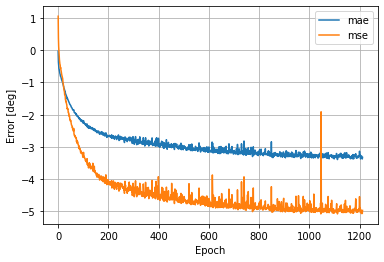

In [91]:
def plot_loss(history):
    plt.figure()
    plt.plot(np.log(history.history['mae']), label='mae')
    plt.plot(np.log(history.history['mse']), label='mse')
    plt.xlabel('Epoch')
    plt.ylabel('Error [deg]')
    plt.legend()
    plt.grid(True)
    
plot_loss(history)


### 4-layer Network: Predict Against Training Data as a Sanity Check

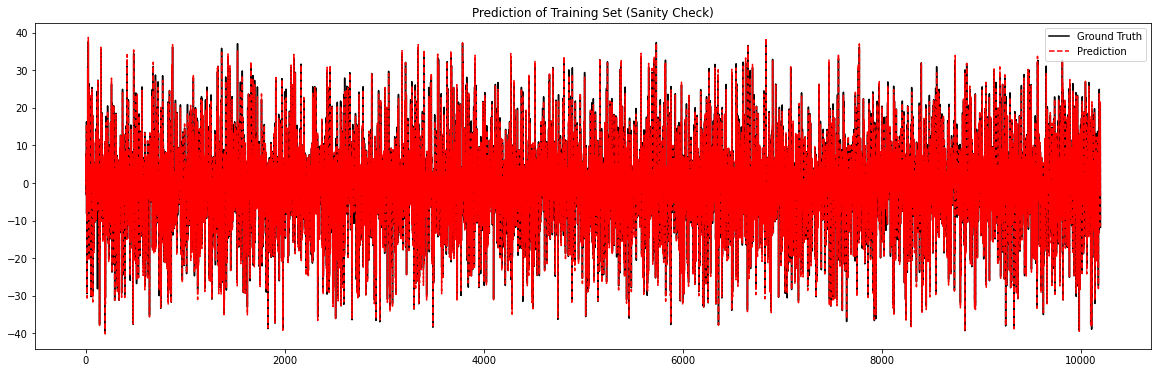

Average error is 0.01 degrees
Root Mean Squared Error is 0.36 degrees


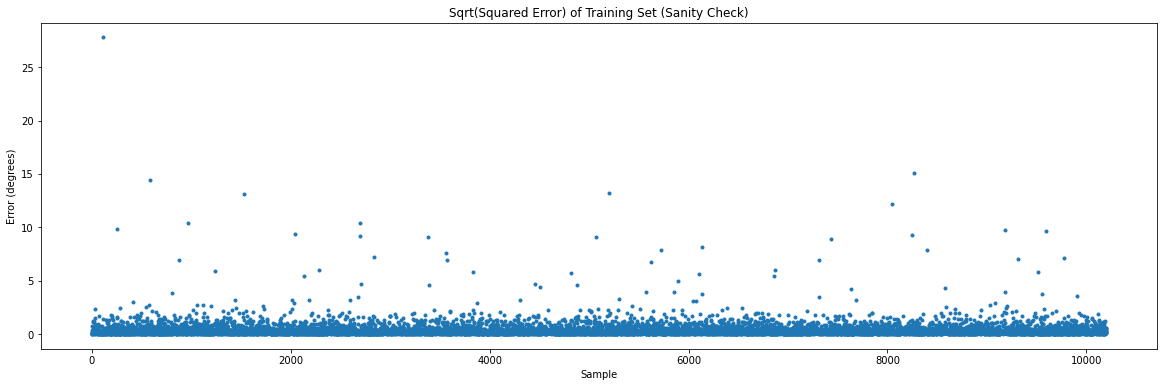

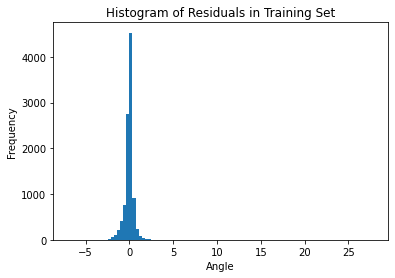

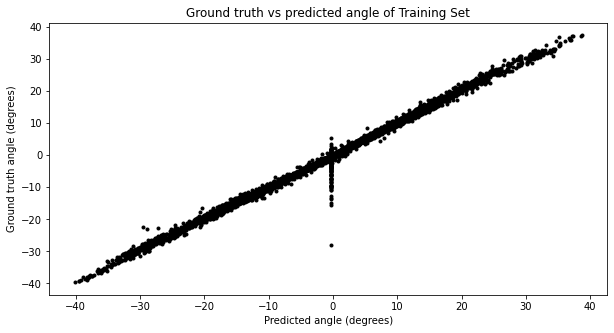

In [92]:

# sanity check with 80% data
Xtrain = Trainset.iloc[:,:-1].values
Xtrain = sc_X.transform(Xtrain)
y_pred = model.predict(Xtrain)
#y_pred = sc_y.inverse_transform(y_pred)
y_pred = sc_y.inverse_transform(y_pred)
y_new = Trainset.iloc[:,-1:].values
plt.figure(figsize=(20,6))
plt.plot(y_new,'k')
plt.plot(y_pred,'r--')
plt.title('Prediction of Training Set (Sanity Check)')
#plt.axis([xmin, xmax, ymin, ymax])
plt.legend(labels=['Ground Truth','Prediction'])
plt.show()
# Squared-root of Squared Error

test_error = (y_pred - y_new)
print('Average error is {:4.2f} degrees'.format(np.sum(test_error)/test_error.shape[0]))
rmse = np.sqrt(test_error**2)
print('Root Mean Squared Error is {:4.2f} degrees'.format(np.sum(rmse)/test_error.shape[0]))
plt.figure(figsize=(20,6))
plt.plot(rmse,'.')
plt.title('Sqrt(Squared Error) of Training Set (Sanity Check)')
plt.xlabel('Sample')
plt.ylabel('Error (degrees)')
plt.show()

plt.figure()
plt.hist(test_error,bins=100)
plt.title('Histogram of Residuals in Training Set')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

#plot scatterplot of data
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_new,marker='.',color='black')
plt.xlabel('Predicted angle (degrees)')
plt.ylabel('Ground truth angle (degrees)')
plt.title('Ground truth vs predicted angle of Training Set')
plt.show()

### 4-layer Neural Network: Predict Test Set

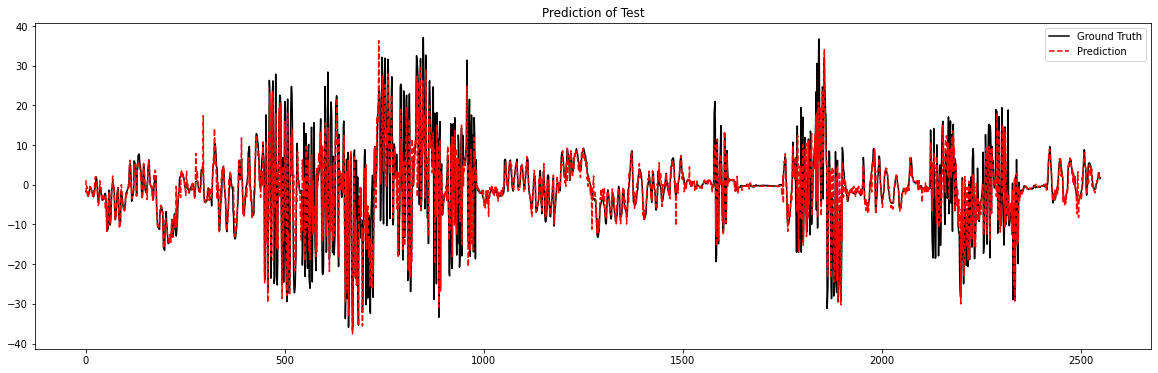

Average error is 0.01 degrees
Root Mean Squared Error is 3.07 degrees


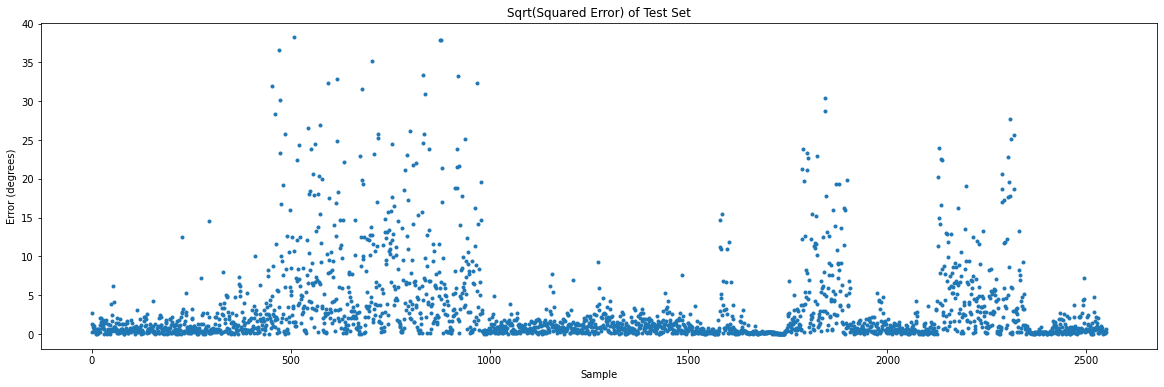

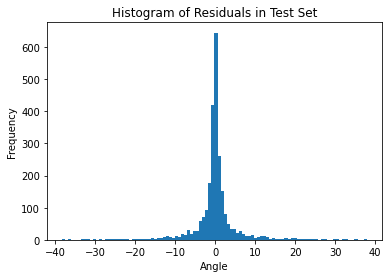

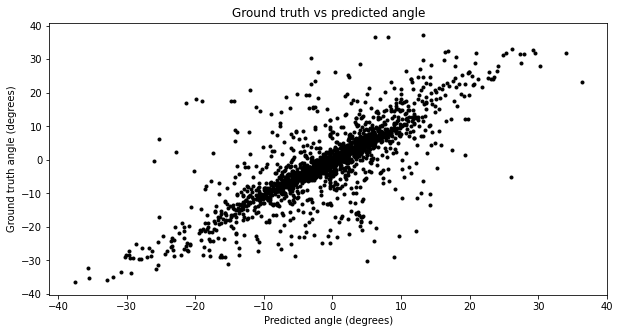

In [93]:
# Redo test set
Xtest = Testset.iloc[:,:-1].values
Xtest = sc_X.transform(Xtest)
y_pred = model.predict(Xtest)
y_pred = sc_y.inverse_transform(y_pred)
y_new = Testset.iloc[:,-1:].values

plt.figure(figsize=(20,6))
plt.plot(y_new,'k')
plt.plot(y_pred,'r--')
plt.title('Prediction of Test')
#plt.axis([xmin, xmax, ymin, ymax])
plt.legend(labels=['Ground Truth','Prediction'])
plt.show()

# Squared-root of Squared Error

test_error = (y_pred - y_new)
print('Average error is {:4.2f} degrees'.format(np.sum(test_error)/test_error.shape[0]))
rmse = np.sqrt(test_error**2)
print('Root Mean Squared Error is {:4.2f} degrees'.format(np.sum(rmse)/test_error.shape[0]))
plt.figure(figsize=(20,6))
plt.plot(rmse,'.')
plt.title('Sqrt(Squared Error) of Test Set')
plt.xlabel('Sample')
plt.ylabel('Error (degrees)')
plt.show()

plt.figure()
plt.hist(test_error,bins=100)
plt.title('Histogram of Residuals in Test Set')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

#plot scatterplot of data
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_new,marker='.',color='black')
plt.xlabel('Predicted angle (degrees)')
plt.ylabel('Ground truth angle (degrees)')
plt.title('Ground truth vs predicted angle')
plt.show()

In [69]:
save_notebookparams = 1
if save_notebookparams:
    pkl_filename = "depthforcemodelparam_nn4.pkl"
    randata = {}
    randata['nsamps']=nsamps
    randata['n80p']=n80p
    randata['rannums']=rannums
    randata['test_set']=test_set
    modelhistory = history.history
    
    
    with open(pkl_filename, 'wb') as file:
        pickle.dump([randata,sc_X,sc_y,modelhistory], file)
        
    model.save('depthforcemodel_nn4.h5') 